### Import necessary libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

### Configure Loguru logger for debugging and tracking

In [2]:
logger.add(
    "../logs/sentiment_analysis.log",
    rotation="5 MB",
    retention="10 days",
    level="INFO",
    enqueue=True,
    backtrace=True,
    diagnose=True
)


1

### analyze sentiment

In [3]:
def analyze_sentiment(text):
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity  # Sentiment polarity range: -1 (negative) to 1 (positive)
    except Exception as e:
        logger.error(f"Error analyzing sentiment: {e}")
        return 0

### paths for data loading and saving

In [4]:
processed_data_path = '../data/processed/british_airways_processed_reviews.csv'
analysis_data_path = '../data/analysis/british_airways_reviews_with_sentiment.csv'


In [5]:
# Ensure analysis data directory exists
os.makedirs('../data/analysis/', exist_ok=True)

### Load processed data

In [6]:
try:
    df = pd.read_csv(processed_data_path)
    logger.info(f"Loaded cleaned data with {len(df)} reviews.")
    display(df.head())  # Display first few rows of the data for review
except Exception as e:
    logger.error(f"Error loading cleaned data: {e}")


2024-11-01 22:27:19.432 | INFO     | __main__:<module>:3 - Loaded cleaned data with 2000 reviews.


,content_processed
0,flight scheduled 1840 left 2hours 40 minute al...
1,flying ba 15 year american airline ff gave ba ...
2,arriving mexico airport told flight delayed ai...
3,flown british airway many year still regularly...
4,bought ticket geneva london flight got airport...


### Perform sentiment analysis on the 'content_preprocessed' column

In [7]:
try:
    logger.info("Starting sentiment analysis.")
    df['sentiment_polarity'] = df['content_processed'].apply(analyze_sentiment)
    display(df[['content_processed', 'sentiment_polarity']].sample(5))  # Show sample of analysis results
except Exception as e:
    logger.error(f"Error during sentiment analysis: {e}")


2024-11-01 22:27:19.548 | INFO     | __main__:<module>:2 - Starting sentiment analysis.


,content_processed,sentiment_polarity
1916,verified review flew reward flight london heat...,0.262281
998,mykonos london flight delayed waiting depart t...,-0.766667
1633,verified review ba used nice airline great cus...,0.242593
781,london city berlin 8th march flight got cancel...,-0.475000
94,chose rotterdam london city airport convenienc...,0.029167


### Save the analysis data with sentiment polarity

In [8]:
try:
    df.to_csv(analysis_data_path, index=False)
    logger.info(f"Sentiment analysis results saved to {analysis_data_path}")
except Exception as e:
    logger.error(f"Error saving analysis data: {e}")

2024-11-01 22:27:22.117 | INFO     | __main__:<module>:3 - Sentiment analysis results saved to ../data/analysis/british_airways_reviews_with_sentiment.csv


### Plot the sentiment polarity distribution

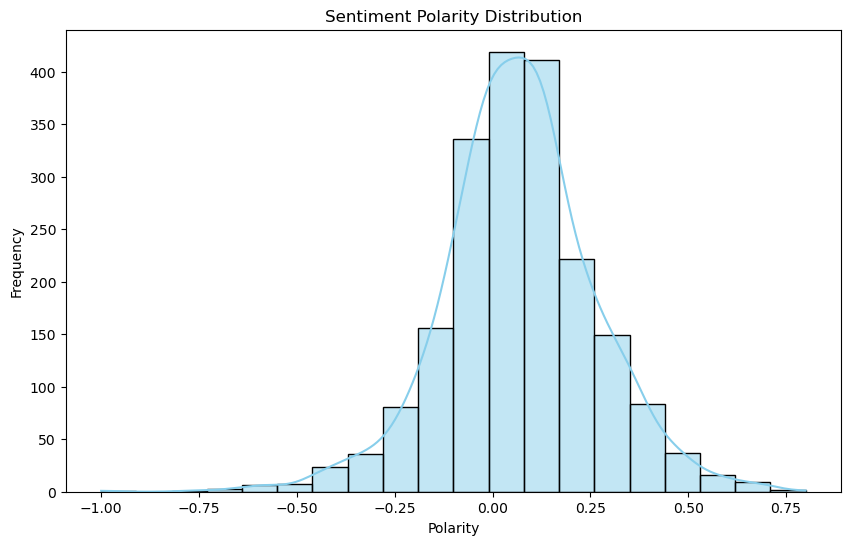

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


### Save the plot

In [10]:
try:
    plt.savefig('../data/analysis/sentiment_distribution.png')
    logger.info("Sentiment distribution plot saved.")
except Exception as e:
    logger.error(f"Error saving sentiment distribution plot: {e}")


2024-11-01 22:27:22.880 | INFO     | __main__:<module>:3 - Sentiment distribution plot saved.


<Figure size 640x480 with 0 Axes>